[*********************100%***********************]  1 of 1 completed


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2463.76
Distribution:                  Normal   AIC:                           4935.52
Method:            Maximum Likelihood   BIC:                           4955.97
                                        No. Observations:                 1226
Date:                Thu, Nov 14 2024   Df Residuals:                     1225
Time:                        17:19:23   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1499  5.226e-02      2.868  4.136e-03 [4.743e-0

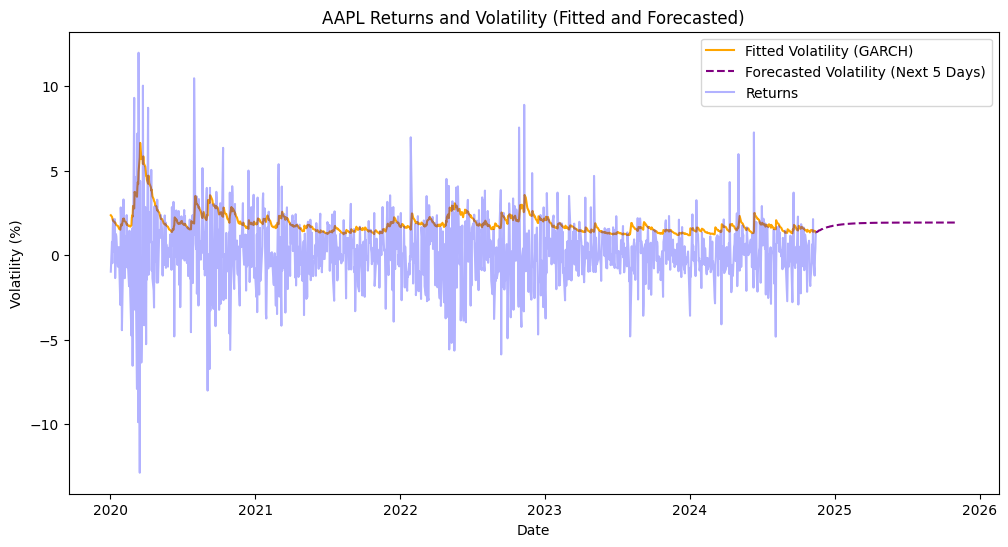

In [6]:
#Import all needed libraries (pip install if needed) 
import yfinance as yf
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt

#Download stock data from your ticker (and dates) of choice
ticker = 'AAPL'
data = yf.download(ticker, start = '2020-01-01')

#Determine daily returns by looking at the percent change
data['Return'] = data['Adj Close'].pct_change().dropna() * 100
returns = data['Return'].dropna()

#Use a GARCH(1,1) model to look at the returns
model = arch_model(returns, vol = 'Garch', p = 1, q = 1)
garch_fit = model.fit(disp='off')

#If you want to look at the summary of the GARCH model (not needed)
print(garch_fit.summary())

#Create a variable for the historical volatility of the returns
fitted_volatility = garch_fit.conditional_volatility

#Forecast the next 252 days (1 year)
forecast_days = 252
forecast = garch_fit.forecast(horizon = forecast_days)
forecasted_volatility = np.sqrt(forecast.variance.iloc[-1].values)

#Creating a range of dates to forecast (we set the periods to equal forecast_days + 1 because we don't want to include the most recent day, then get rid of the first day by slicing)
#"freq = B" refers to only forecasting business days
forecast_index = pd.date_range(start=returns.index[-1], periods = forecast_days + 1, freq = 'B')[1:]

#Then, we actually forecast the volatility across our date range
forecasted_vol_df = pd.DataFrame(forecasted_volatility, index = forecast_index, columns = ['Forecasted Volatility'])

#Now, we're ready to plot! Start by assigning the dimensions to the plot itslef
plt.figure(figsize=(12, 6))

#Then, plot the historical volatility
plt.plot(returns.index, fitted_volatility, label = 'Fitted Volatility (GARCH)', color='orange')

#Plot the forecasted volatility
plt.plot(forecasted_vol_df.index, forecasted_volatility, label = 'Forecasted Volatility (Next 5 Days)', color = 'purple', linestyle = '--')

#OPTIONAL: You can also plot the returns themselves to look at how the GARCH model alligns with the volatility present within the returns. 
plt.plot(returns, label='Returns', color='blue', alpha = 0.3)

#Plotting the rest of the aesthetics
plt.title(f'{ticker} Returns and Volatility (Fitted and Forecasted)')
plt.xlabel('Date')
plt.ylabel('Volatility (%)') #Might want to change this to Volatility/Return % if you add the returns plot
plt.legend()

#Showing the volatilities (could be useful to add to the plot!)
print(f"Today's volatility: {fitted_volatility.iloc[-1]:.2f}%")
print(f"1 year's volatility: {forecasted_volatility[-1]:.2f}%")

[*********************100%***********************]  1 of 1 completed

p-value: 0.000000


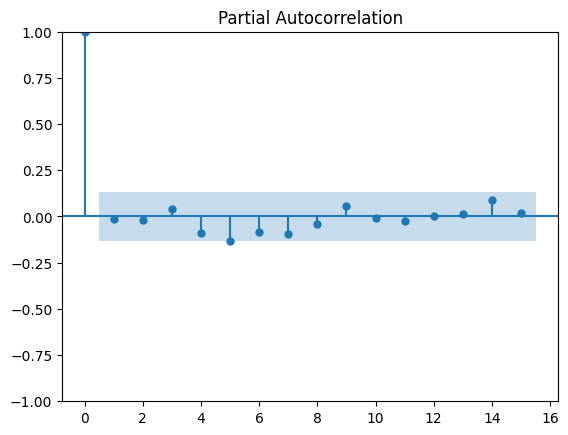

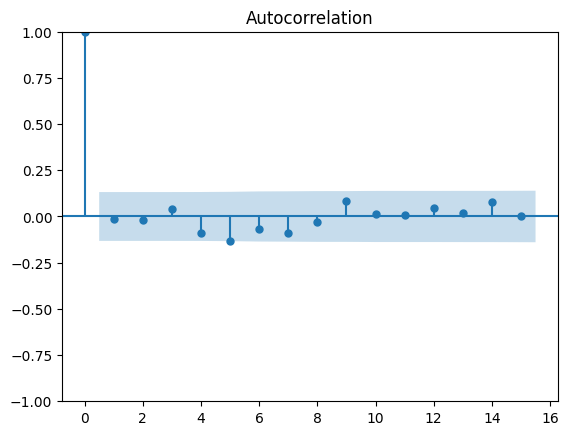

/Users/devan/Documents/Schooling/SIG/Notebooks/myenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/devan/Documents/Schooling/SIG/Notebooks/myenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/devan/Documents/Schooling/SIG/Notebooks/myenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/devan/Documents/Schooling/SIG/Notebooks/myenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966:

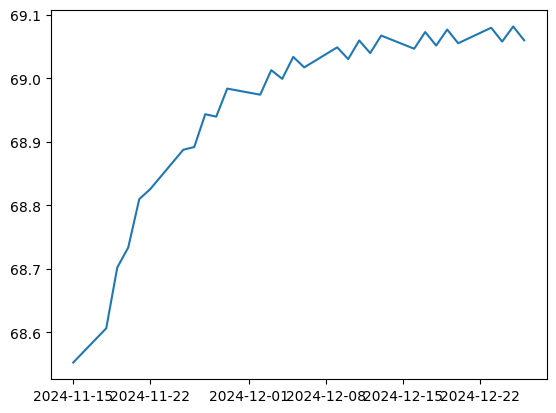

In [10]:
#Import Packages
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



#Download the data
ticker = "CL=F" #CL=F is oil
data = yf.download(ticker, start = '2024-01-01')['Adj Close']

#Check the P,D,Q values 
dataDiff = data.diff(1).dropna()
adf_test = adfuller(dataDiff)

print('p-value: %f' % adf_test[1])

plot_pacf(dataDiff, lags=15)
plot_acf(dataDiff, lags=15)
plt.show()


#Define out p,d,q and create the model
p,d,q = 2,1,2
modelARIMA = ARIMA(data, order = (p,d,q)).fit()

#set how far out we want to look and run the forecast
forecastSteps = 30
forecast = modelARIMA.forecast(steps=forecastSteps)

#reindex the forecast dates so its correct
last_date = data.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecastSteps, freq='B')  # Business days
forecast.index = forecast_index

#plotting
# plt.plot(data, label = "ADJ CLOSE")
plt.plot(forecast,label = "forecasted")
plt.show()